In [1]:
from dredFISH.Analysis.TissueGraph import *
from dredFISH.Visualization.Viz import *
import matplotlib.pyplot as plt 

from scipy.cluster.hierarchy import *
from scipy.stats.contingency import crosstab

from scipy.interpolate import interp2d, interp1d

from scipy.special import rel_entr

rng = np.random.default_rng()

In [2]:
TMG = TissueMultiGraph('TMG_dev7.pkl')
TMG.Layers=TMG.Layers[0:2]

In [14]:
def f_dist(E1,E2):
    return(TMG.dist_KLpairing(E1,E2))
coherence_order = 1
smooth_ordr = 1
median_suppress_ordr = 1
EdgeWeight,NodeWeight = TMG.Layers[1].calc_graph_env_coherence(coherence_order,f_dist)

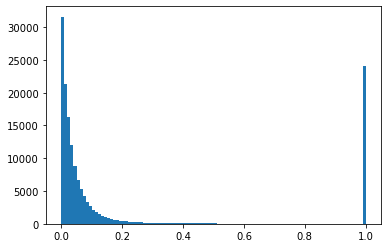

In [15]:
plt.hist(EdgeWeight,bins=100);

In [32]:
np.mean(EdgeWeight<0.01)

0.20753167758166544

27274


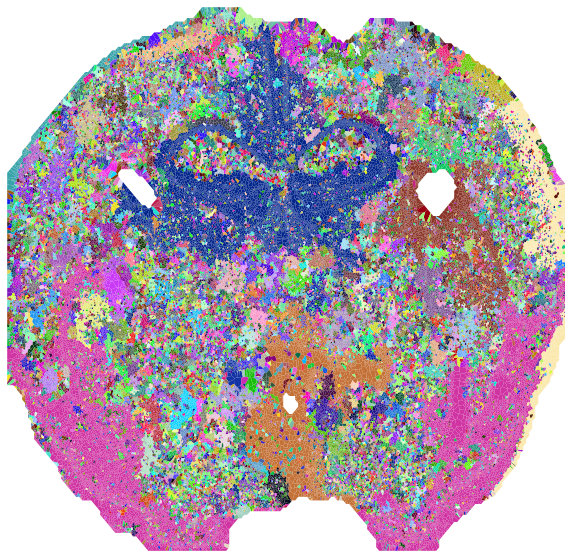

In [38]:
G = TMG.Layers[1].SG.copy()
EL = np.asarray(G.get_edgelist()).astype("int")
ix = np.flatnonzero(EdgeWeight>0.01)
edge_tuples = list(map(tuple, EL[ix,:]))
G.delete_edges(edge_tuples) 

cmp = G.components()
print(len(cmp))
id = np.array(cmp.membership).astype('int')
unq,cnt = np.unique(id,return_counts=True)

to_map = id
V = RandomColorpleth(TMG,id_vec=to_map)
V.set_view()
V.figsize=(10,10)
V.plot()



In [39]:
NodeWeight_med_filt_sml.shape

(97786,)

In [40]:
def f_dist(E1,E2):
    return(TMG.dist_KLpairing(E1,E2))
coherence_order = 2
smooth_ordr = 4
median_suppress_ordr = 6
krnl = np.arange(start=smooth_ordr+1,stop=0,step=-1)
krnl = krnl/krnl.sum()

_,NodeWeight = TMG.Layers[1].calc_graph_env_coherence(coherence_order,f_dist)
NodeWeight = -NodeWeight
        
NodeWeight = TMG.Layers[1].graph_local_avg(NodeWeight,ordr = smooth_ordr,kernel = krnl)
        
cell_lvl_coherence = TMG.map_to_cell_level(1,NodeWeight)
        
NodeWeight_med_filt_big = TMG.Layers[0].graph_local_median(cell_lvl_coherence,ordr = median_suppress_ordr)

coherence_order = 1
smooth_ordr = 1
median_suppress_ordr = 1
krnl = np.arange(start=smooth_ordr+1,stop=0,step=-1)
krnl = krnl/krnl.sum()

_,NodeWeight = TMG.Layers[1].calc_graph_env_coherence(coherence_order,f_dist)
NodeWeight = -NodeWeight
        
NodeWeight = TMG.Layers[1].graph_local_avg(NodeWeight,ordr = smooth_ordr,kernel = krnl)
        
cell_lvl_coherence = TMG.map_to_cell_level(1,NodeWeight)
        
NodeWeight_med_filt_sml = TMG.Layers[0].graph_local_median(cell_lvl_coherence,ordr = median_suppress_ordr)

to_map = np.array(NodeWeight_med_filt_sml)
V = Colorpleth(TMG,values_to_map=to_map)
V.set_view()
V.clrmp = 'magma'
V.figsize=(10,10)
V.plot()

to_map = np.array(NodeWeight_med_filt_big)
V = Colorpleth(TMG,values_to_map=to_map)
V.set_view()
V.clrmp = 'magma'
V.figsize=(10,10)
V.plot()

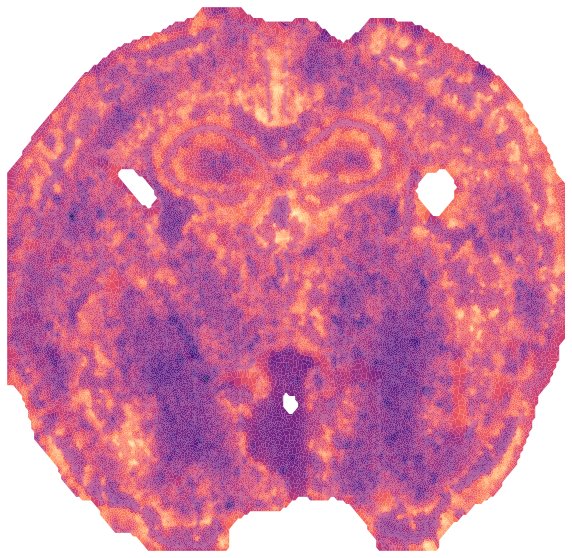

In [41]:
smooth_ordr = 10
krnl = np.arange(start=smooth_ordr+1,stop=0,step=-1)
krnl = krnl/krnl.sum()
NodeWeightDiff = NodeWeight_med_filt_sml-NodeWeight_med_filt_big
NodeWeightDiff = TMG.Layers[0].graph_local_avg(NodeWeightDiff,ordr = smooth_ordr,kernel = krnl)

to_map = np.array(NodeWeightDiff)
V = Colorpleth(TMG,values_to_map=to_map)
V.set_view()
V.clrmp = 'magma'
V.figsize=(10,10)
V.plot()

In [42]:
HoodId,DistToPeak = TMG.Layers[0].watershed(NodeWeightDiff)
TMG.cell_attributes['watersheds'] = DistToPeak
hz_id = np.zeros(TMG.Layers[1].N)
iz_ix = TMG.Layers[1].UpstreamMap
for i in range(TMG.Layers[1].N):
    hz_id[i] = np.array(mode(HoodId[iz_ix==i])[0])

# make sure all hz_id are continous and if they are not, break them using graph contraction
CG = TMG.Layers[1].contract_graph(hz_id)
Id = np.arange(CG.N)
hz_id = Id[CG.UpstreamMap]

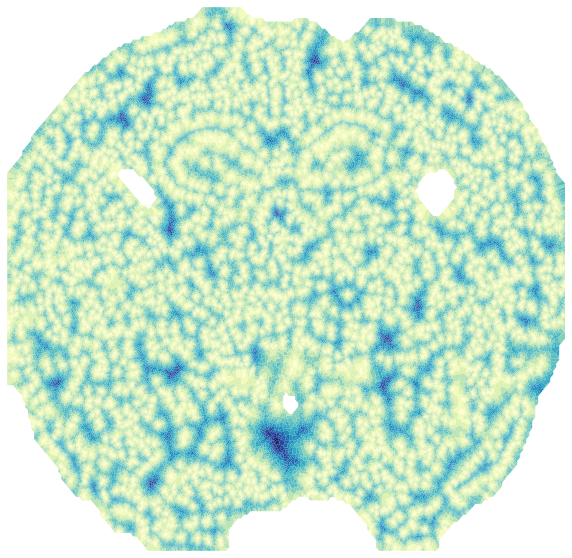

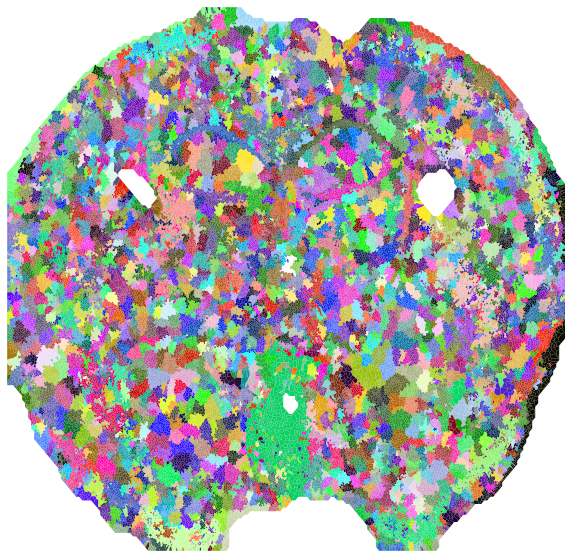

In [43]:
to_map = DistToPeak
V = Colorpleth(TMG,values_to_map=to_map)
V.set_view()
V.clrmp = 'YlGnBu'
V.figsize=(10,10)
V.plot()

V = RandomColorpleth(TMG,id_vec=hz_id)
V.set_view()
V.figsize=(10,10)
V.plot()

In [13]:
min_neigh_size = 10
min_hz_size = 2
smooth_ordr = 2
median_suppress_ordr = 2
krnl = np.arange(start=smooth_ordr+1,stop=0,step=-1)
krnl = krnl/krnl.sum()
def f_dist(E1,E2):
    return(TMG.dist_KLpairing(E1,E2))
hz_id = TMG.find_heterozones_based_on_coherence(ordr = 2,
                                                f_dist = f_dist,
                                                f_transform = lambda x: -x,
                                                smooth_ordr = smooth_ordr,
                                                smooth_kernel=krnl,
                                                median_suppress_ordr=median_suppress_ordr)

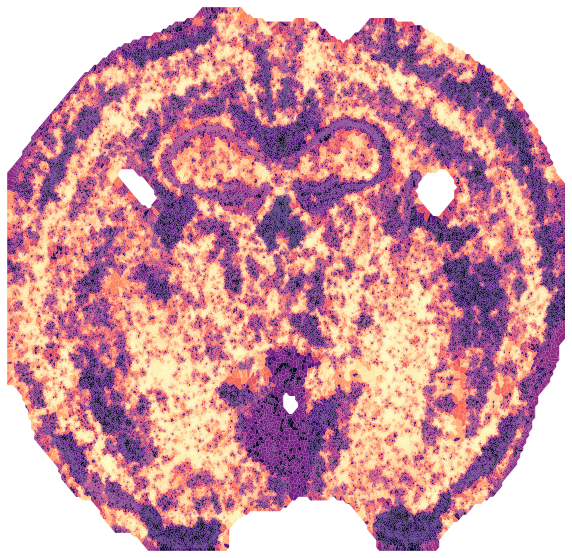

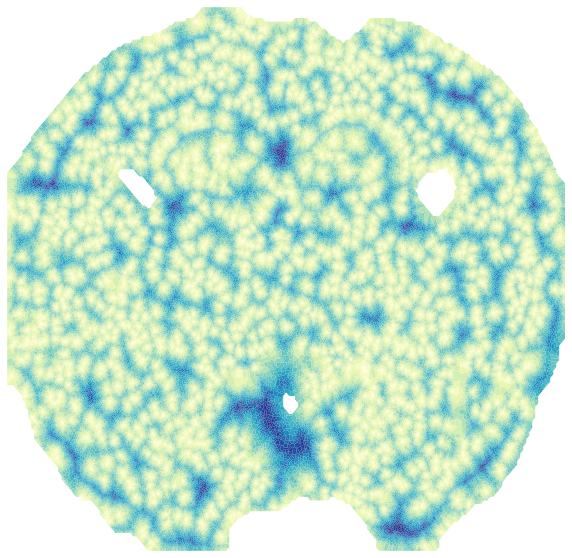

In [14]:
to_map = np.array(TMG.cell_attributes['coherence'])
V = Colorpleth(TMG,values_to_map=to_map)
V.set_view()
V.clrmp = 'magma'
V.figsize=(10,10)
V.plot()


to_map = np.array(TMG.cell_attributes['watersheds'])
V = Colorpleth(TMG,values_to_map=to_map)
V.set_view()
V.clrmp = 'YlGnBu'
V.figsize=(10,10)
V.plot()

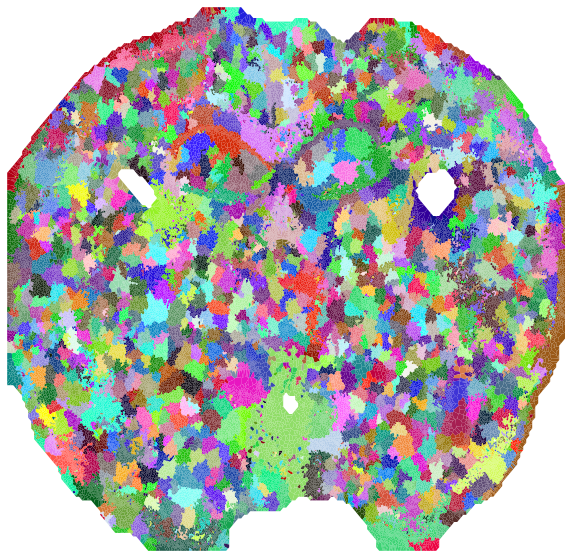

In [15]:
V = RandomColorpleth(TMG,id_vec=hz_id)
V.set_view()
V.figsize=(10,10)
V.plot()

In [44]:
min_neigh_size = 10
TMG.create_heterozone_and_neighborood_layers(hz_id,min_neigh_size = min_neigh_size,f_dist = dist_jsd)

Calling initial optimization
 
 Func-count     x          f(x)          Procedure
    1        11.5208     -2.04427        initial
    2        18.5792     -2.21676        golden
    3        22.9416     -2.25393        golden
    4        23.8162     -2.26528        parabolic
    5        26.1782      -2.2598        golden
    6        24.7519     -2.26064        parabolic
    7        24.1736     -2.26156        golden
    8        23.4821     -2.25755        golden
    9        23.9527     -2.25669        golden
   10        23.6886     -2.27025        golden
   11        23.6097     -2.25507        golden
   12        23.7374     -2.26626        golden
   13        23.6585     -2.26696        golden
   14        23.6961     -2.25623        parabolic
   15        23.6771     -2.25968        golden
   16        23.6842     -2.26224        golden
   17        23.6919     -2.26506        golden

Optimization terminated successfully;
The returned value satisfies the termination criteria

In [45]:
TMG.finalize_heterozone_and_neighborhood_layers()


In [47]:
TMG.Layers[3].calc_type2(n_cls=4)

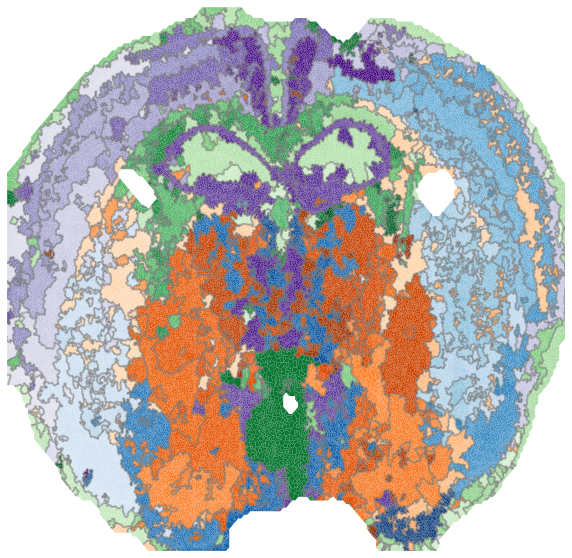

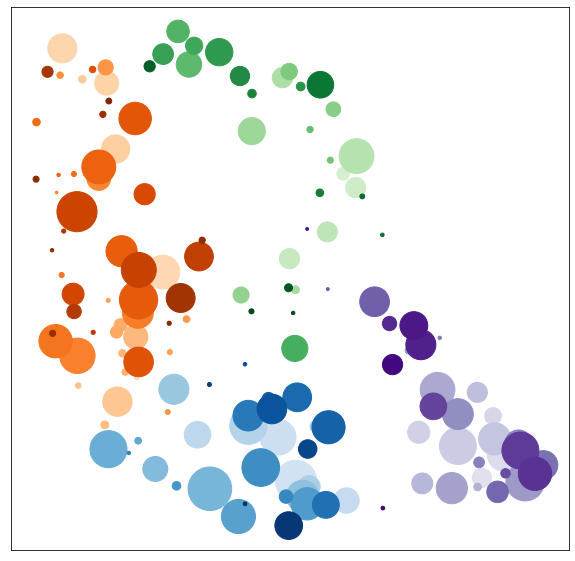

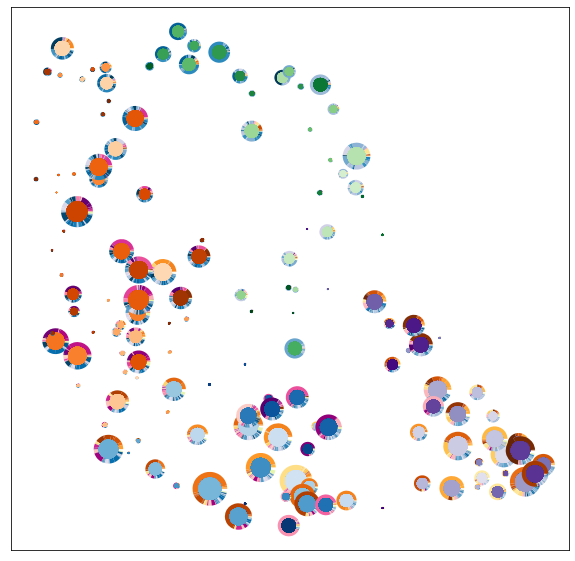

In [49]:
Vcellmap = CellMap(TMG)
Vcellmap.figsize = (10,10)
Vcellmap.cmap_list = ['YlOrBr','RdPu','PuBu','YlGn']
Vcellmap.set_view()
Vneighborhood = NeighborhoodMapWithLines(TMG)
Vneighborhood.figsize = (10,10)
Vneighborhood.cmap_list = ['Purples','Oranges','Blues','Greens','Reds','cividis']
Vneighborhood.set_view()
Vneighborhood.plot(Vcellmap)

In [13]:
def f_dist(E1,E2=None):
    return(TMG.dist_mix_envprob_and_jsd(E1,E2))
min_hz_size=2
hz_id = TMG.refine_heterozone_and_neighborood_layers(min_hz_size = min_hz_size,f_dist = f_dist)


TypeError: 'numpy.ndarray' object is not callable

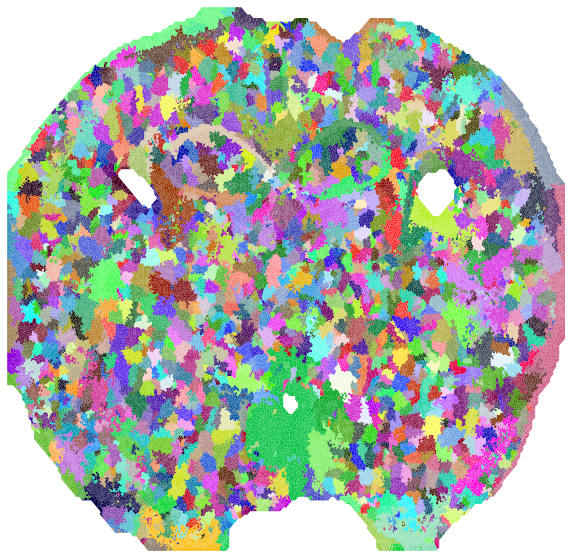

In [15]:
V = RandomColorpleth(TMG,id_vec=hz_id)
V.set_view()
V.figsize=(10,10)
V.plot()

In [28]:

def f_dist(E1,E2 = None):
    return(TMG.dist_mix_envprob_and_jsd(E1,E2))
TMG.create_heterozone_and_neighborood_layers(hz_id,min_neigh_size = min_neigh_size,f_dist = f_dist)

NameError: name 'interp2d' is not defined

In [17]:
TMG.finalize_heterozone_and_neighborhood_layers()

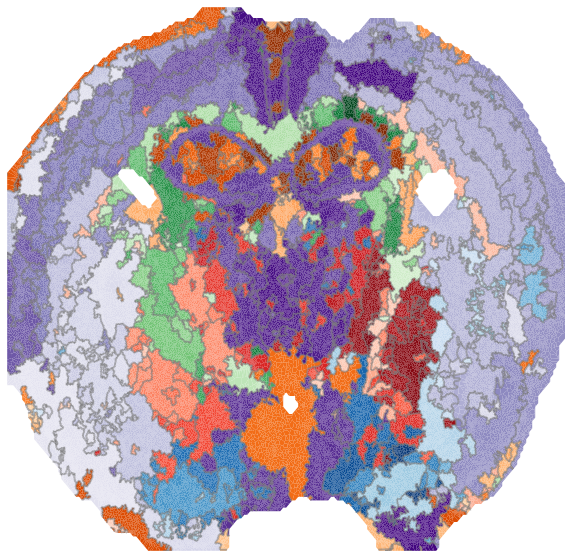

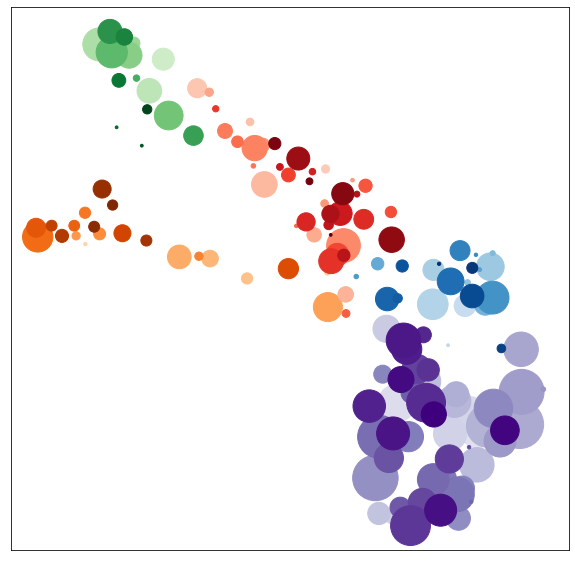

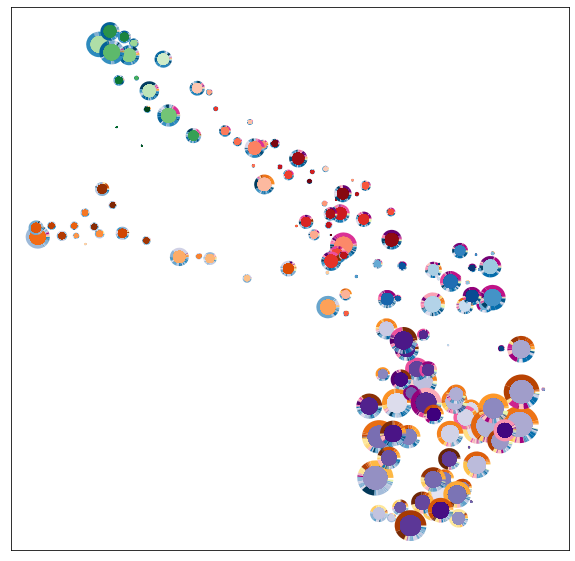

In [18]:
Vneighborhood = NeighborhoodMapWithLines(TMG)
Vneighborhood.figsize = (10,10)
Vneighborhood.cmap_list = ['Purples','Oranges','Blues','Reds','Greens','cividis']
Vneighborhood.set_view()
Vneighborhood.plot(Vcellmap)